# prepare dataset

In [ ]:
import os
import zipfile
import shutil
import random
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import glob
from PIL import Image
import numpy as np

In [ ]:
# Unduh dataset dari Kaggle dan unggah ke Google Colab
!pip install -q kaggle
os.environ['KAGGLE_USERNAME'] = 'rezaldi'
os.environ['KAGGLE_KEY'] = '8cf4e8b9dbf3749ff34c10459a53a6f4'
!kaggle datasets download -d alexfordna/garbage-seg-10-v5
!kaggle datasets download -d dataclusterlabs/masks-dataset
# Ekstrak file zip
with zipfile.ZipFile('/content/garbage-seg-10-v5.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

with zipfile.ZipFile('/content/masks-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/masks-datasett')

 94% 234M/250M [00:01<00:00, 147MB/s]
100% 250M/250M [00:01<00:00, 146MB/s]
 85% 33.0M/39.0M [00:00<00:00, 58.7MB/s]
100% 39.0M/39.0M [00:00<00:00, 67.9MB/s]


In [ ]:
# Tentukan direktori dataset medical yang akan digabungkan
medical_dataset_dir = '/content/masks-datasett/images/images'

# Tentukan direktori tujuan untuk menggabungkan dataset ke dalam kategori "medical"
medical_target_dir = '/content/dataset/Garbage Seg 10 V5/medical'
os.makedirs(medical_target_dir, exist_ok=True)

# Pindahkan semua file dari dataset medical ke direktori tujuan
for root, dirs, files in os.walk(medical_dataset_dir):
    for file in files:
        src_file = os.path.join(root, file)
        shutil.move(src_file, medical_target_dir)

print("Dataset medical telah digabungkan ke dalam kategori 'medical'.")

Dataset medical telah digabungkan ke dalam kategori 'medical'.


In [ ]:
# Tentukan direktori dataset medical yang akan digabungkan
medical_dataset_dir = '/content/fotosampah'

# Tentukan direktori tujuan untuk menggabungkan dataset ke dalam kategori "medical"
medical_target_dir = '/content/dataset/Garbage Seg 10 V5/medical'
os.makedirs(medical_target_dir, exist_ok=True)

# Pindahkan semua file dari dataset medical ke direktori tujuan
for root, dirs, files in os.walk(medical_dataset_dir):
    for file in files:
        src_file = os.path.join(root, file)
        shutil.move(src_file, medical_target_dir)

print("Dataset medical telah digabungkan ke dalam kategori 'medical'.")

Dataset medical telah digabungkan ke dalam kategori 'medical'.


In [ ]:
# Buat folder untuk train, validation, dan test
base_dir = '/content/dataset'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# Kategori sampah yang bisa dijual (sellable)
sellable_categories = ['battery', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes']
# Kategori sampah yang tidak bisa dijual (unsellable)
unsellable_categories = ['food', 'medical']

In [ ]:
# Memindahkan gambar ke folder yang sesuai
for category in sellable_categories:
    category_train_dir = os.path.join(train_dir, 'sellable', category)
    os.makedirs(category_train_dir, exist_ok=True)

    images_dir = os.path.join('/content/dataset/Garbage Seg 10 V5/', category)
    images = os.listdir(images_dir)

    for image in images:
        src_path = os.path.join(images_dir, image)
        dst_path = os.path.join(category_train_dir, image)
        shutil.copy(src_path, dst_path)

for category in unsellable_categories:
    category_train_dir = os.path.join(train_dir, 'unsellable', category)
    os.makedirs(category_train_dir, exist_ok=True)

    images_dir = os.path.join('/content/dataset/Garbage Seg 10 V5/', category)
    images = os.listdir(images_dir)

    for image in images:
        src_path = os.path.join(images_dir, image)
        dst_path = os.path.join(category_train_dir, image)
        shutil.copy(src_path, dst_path)

In [ ]:
import shutil

# Menentukan jumlah oversampling yang dibutuhkan
food_count = 6500
medical_count = 6500
food_dir = os.path.join(train_dir, 'unsellable', 'food')
medical_dir = os.path.join(train_dir, 'unsellable', 'medical')

# Membuat direktori tujuan untuk oversampling
oversampled_food_dir = '/content/dataset/train/unsellable/food'
oversampled_medical_dir = '/content/dataset/train/unsellable/medical'

os.makedirs(oversampled_food_dir, exist_ok=True)
os.makedirs(oversampled_medical_dir, exist_ok=True)

# Melakukan oversampling pada kategori 'food'
food_images = os.listdir(food_dir)
oversampling_factor = food_count // len(food_images)

for image in food_images:
    src_path = os.path.join(food_dir, image)

    # Mengulang pengulangan gambar sesuai faktor oversampling
    for i in range(oversampling_factor):
        new_image_name = f"oversampled_{i}_{image}"
        dst_path = os.path.join(oversampled_food_dir, new_image_name)
        shutil.copy(src_path, dst_path)

# Melakukan oversampling pada kategori 'medical'
medical_images = os.listdir(medical_dir)
oversampling_factor = medical_count // len(medical_images)

for image in medical_images:
    src_path = os.path.join(medical_dir, image)

    # Mengulang pengulangan gambar sesuai faktor oversampling
    for i in range(oversampling_factor):
        new_image_name = f"oversampled_{i}_{image}"
        dst_path = os.path.join(oversampled_medical_dir, new_image_name)
        shutil.copy(src_path, dst_path)

In [ ]:
# Menampilkan hasil setelah oversampling
food_oversampled_count = len(os.listdir(oversampled_food_dir))
medical_oversampled_count = len(os.listdir(oversampled_medical_dir))

print(f"Jumlah food setelah oversampling: {food_oversampled_count}")
print(f"Jumlah medical setelah oversampling: {medical_oversampled_count}")

Jumlah food setelah oversampling: 6895
Jumlah medical setelah oversampling: 7352


In [ ]:
# Memindahkan sebagian gambar dari train ke validation
for category in sellable_categories:
    category_train_dir = os.path.join(train_dir, 'sellable', category)
    category_validation_dir = os.path.join(validation_dir, 'sellable', category)
    os.makedirs(category_validation_dir, exist_ok=True)

    images = os.listdir(category_train_dir)
    num_images = len(images)
    num_validation_images = int(num_images * 0.1)  # 10% untuk validation

    validation_images = images[:num_validation_images]
    for image in validation_images:
        src_path = os.path.join(category_train_dir, image)
        dst_path = os.path.join(category_validation_dir, image)
        shutil.move(src_path, dst_path)

# Memindahkan sebagian gambar dari train ke test
for category in sellable_categories:
    category_train_dir = os.path.join(train_dir, 'sellable', category)
    category_test_dir = os.path.join(test_dir, 'sellable', category)
    os.makedirs(category_test_dir, exist_ok=True)

    images = os.listdir(category_train_dir)
    num_images = len(images)
    num_test_images = int(num_images * 0.1)  # 10% untuk test

    test_images = images[:num_test_images]
    for image in test_images:
        src_path = os.path.join(category_train_dir, image)
        dst_path = os.path.join(category_test_dir, image)
        shutil.move(src_path, dst_path)

# Memindahkan sebagian gambar dari train ke validation (unsellable)
for category in unsellable_categories:
    category_train_dir = os.path.join(train_dir, 'unsellable', category)
    category_validation_dir = os.path.join(validation_dir, 'unsellable', category)
    os.makedirs(category_validation_dir, exist_ok=True)

    images = os.listdir(category_train_dir)
    num_images = len(images)
    num_validation_images = int(num_images * 0.1)  # 10% untuk validation

    validation_images = images[:num_validation_images]
    for image in validation_images:
        src_path = os.path.join(category_train_dir, image)
        dst_path = os.path.join(category_validation_dir, image)
        shutil.move(src_path, dst_path)

# Memindahkan sebagian gambar dari train ke test (unsellable)
for category in unsellable_categories:
    category_train_dir = os.path.join(train_dir, 'unsellable', category)
    category_test_dir = os.path.join(test_dir, 'unsellable', category)
    os.makedirs(category_test_dir, exist_ok=True)

    images = os.listdir(category_train_dir)
    num_images = len(images)
    num_test_images = int(num_images * 0.1)  # 10% untuk test

    test_images = images[:num_test_images]
    for image in test_images:
        src_path = os.path.join(category_train_dir, image)
        dst_path = os.path.join(category_test_dir, image)
        shutil.move(src_path, dst_path)

In [ ]:
# melihat kelas yang ada di direktori train, validation, dan test:
train_classes = os.listdir(os.path.join(train_dir))
validation_classes = os.listdir(os.path.join(validation_dir))
test_classes = os.listdir(os.path.join(test_dir))

print("Classes in Train directory:")
print(train_classes)

print("Classes in Validation directory:")
print(validation_classes)

print("Classes in Test directory:")
print(test_classes)

Classes in Train directory:
['unsellable', 'sellable']
Classes in Validation directory:
['unsellable', 'sellable']
Classes in Test directory:
['unsellable', 'sellable']


In [ ]:
# Menghitung jumlah gambar pada setiap kategori train
train_sellable_counts = sum([len(files) for r, d, files in os.walk(os.path.join(train_dir, 'sellable'))])
train_unsellable_counts = sum([len(files) for r, d, files in os.walk(os.path.join(train_dir, 'unsellable'))])
print(f"Jumlah gambar sellable pada train: {train_sellable_counts}")
print(f"Jumlah gambar unsellable pada train: {train_unsellable_counts}")

Jumlah gambar sellable pada train: 11651
Jumlah gambar unsellable pada train: 11542


# Pra-pemrosesan Data

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 23193 images belonging to 2 classes.
Found 2858 images belonging to 2 classes.
Found 2573 images belonging to 2 classes.


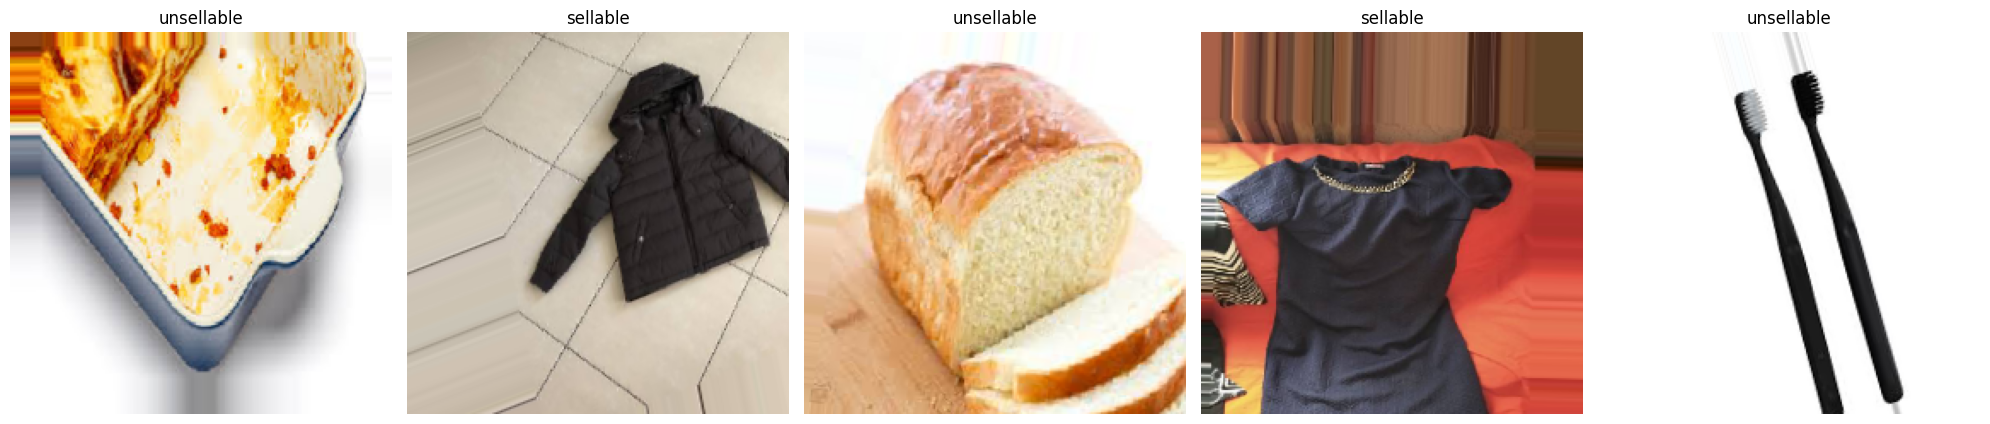

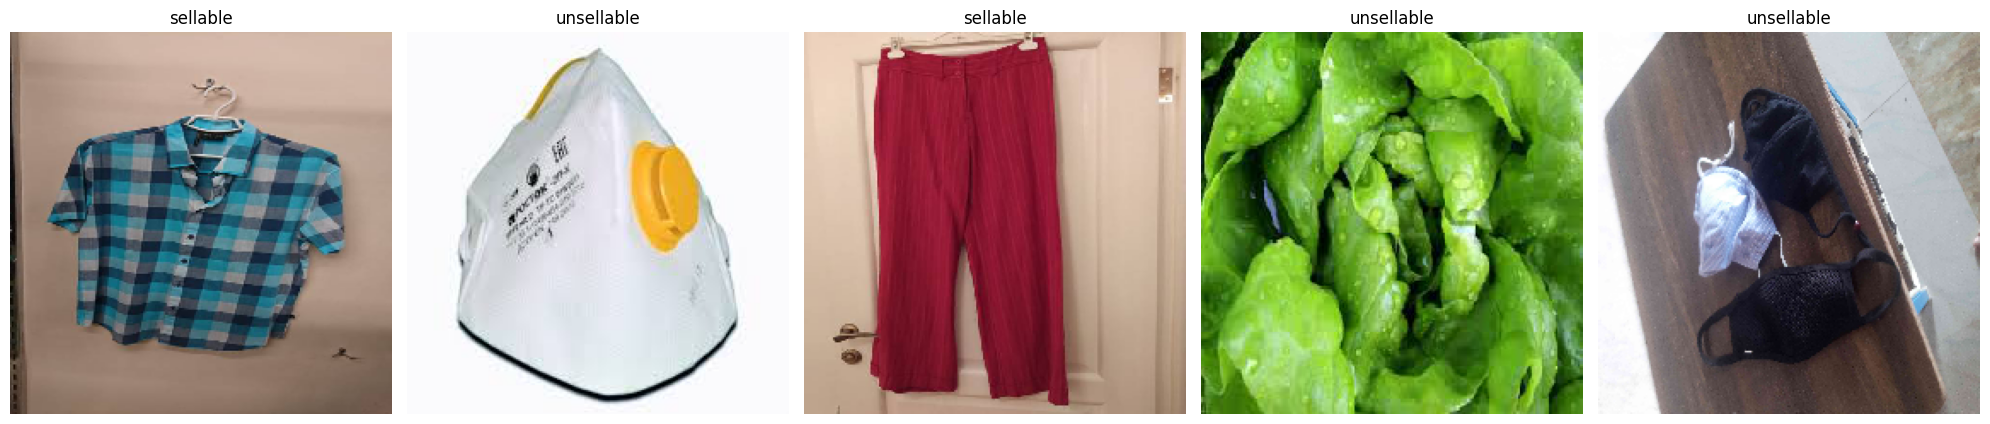

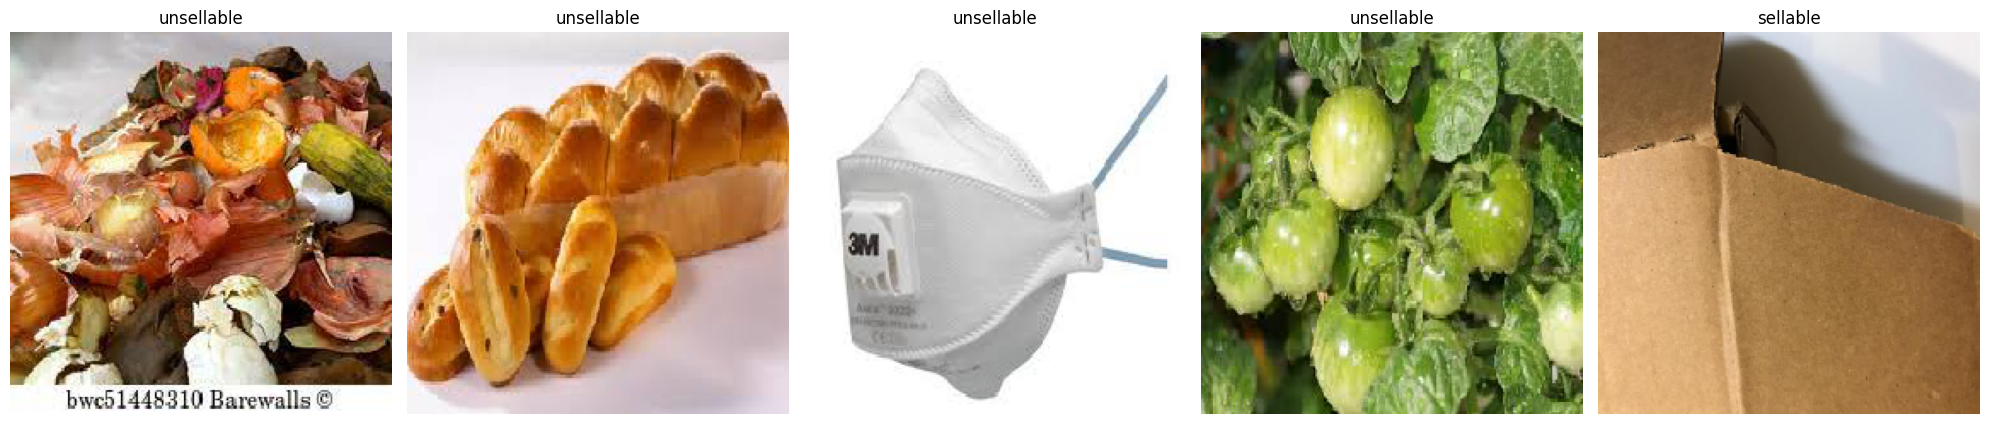

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menampilkan beberapa contoh gambar
def show_images(image_generator, num_images=5):
    # Mendapatkan nama kategori
    class_names = list(image_generator.class_indices.keys())

    # Mendapatkan beberapa contoh gambar
    images, labels = next(image_generator)

    # Menampilkan gambar dan labelnya
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()
    for i in range(num_images):
        img = images[i]
        label = labels[i]
        class_name = class_names[np.argmax(label)]
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Memanggil fungsi show_images untuk train_generator
show_images(train_generator)

# Memanggil fungsi show_images untuk validation_generator
show_images(validation_generator)

# Memanggil fungsi show_images untuk test_generator
show_images(test_generator)


# Model

## modelmanual

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Membangun model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Mengompilasi model
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20
705/705 [==============================] - 305s 426ms/step - loss: 0.4850 - accuracy: 0.7676 - val_loss: 0.3653 - val_accuracy: 0.8402
Epoch 2/20
705/705 [==============================] - 301s 427ms/step - loss: 0.3831 - accuracy: 0.8322 - val_loss: 0.3361 - val_accuracy: 0.8589
Epoch 3/20
705/705 [==============================] - 296s 419ms/step - loss: 0.3396 - accuracy: 0.8564 - val_loss: 0.2859 - val_accuracy: 0.8813
Epoch 4/20
705/705 [==============================] - 298s 422ms/step - loss: 0.3139 - accuracy: 0.8693 - val_loss: 0.3510 - val_accuracy: 0.8453
Epoch 5/20
705/705 [==============================] - 298s 423ms/step - loss: 0.2928 - accuracy: 0.8771 - val_loss: 0.2476 - val_accuracy: 0.9018
Epoch 6/20
705/705 [==============================] - 296s 420ms/step - loss: 0.2721 - accuracy: 0.8877 - val_loss: 0.3193 - val_accuracy: 0.8712
Epoch 7/20
705/705 [==============================] - 297s 422ms/step - loss: 0.2636 - accuracy: 0.8942 - val_loss: 0.2827 -

In [ ]:
# Evaluasi model menggunakan dataset uji
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

79/79 [==============================] - 7s 88ms/step - loss: 0.1338 - accuracy: 0.9480
Test Loss: 0.13382068276405334
Test Accuracy: 0.948041558265686


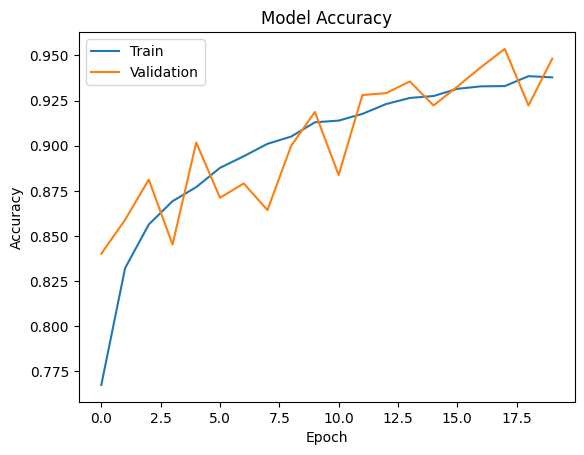

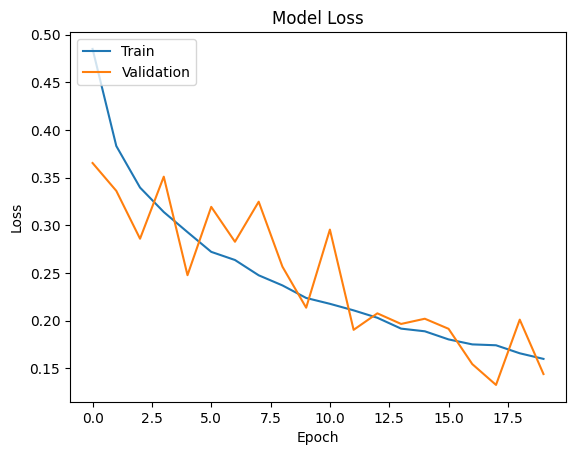

In [ ]:
# Menampilkan grafik akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Menampilkan grafik loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Fungsi untuk memprediksi kategori sampah dari gambar
def predict_category(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    sellable_prob = prediction[0][0]
    unsellable_prob = prediction[0][1]

    if sellable_prob > unsellable_prob:
        return "Sellable"
    else:
        return "Unsellable"

# Contoh penggunaan fungsi predict_category untuk memprediksi kategori sampah dari beberapa gambar
image_paths = glob.glob("/content/tidakdijual/*.jpg")
for image_path in image_paths:
    predicted_category = predict_category(image_path)
    print("Image:", image_path)
    print("Predicted category:", predicted_category)
    print()

1/1 [==============================] - 0s 252ms/step
Image: /content/tidakdijual/055600000_1588684866-20200505-Masker-Bekas-Pakai-Tercecer-di-Pinggir-Jalan-4.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 23ms/step
Image: /content/tidakdijual/medikal1.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 23ms/step
Image: /content/tidakdijual/Masker-4-Lapis-Masker-Hana-KF94-dari-Polytron.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 24ms/step
Image: /content/tidakdijual/sampah-organik.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 23ms/step
Image: /content/tidakdijual/ilustrasi-sampah-makanan.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 25ms/step
Image: /content/tidakdijual/makan1.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 23ms/step
Image: /content/tidakdijual/roti.jpg
Predicted category: Unsellable

1/1

In [ ]:
# Fungsi untuk memprediksi kategori sampah dari gambar
def predict_category(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    sellable_prob = prediction[0][0]
    unsellable_prob = prediction[0][1]

    if sellable_prob > unsellable_prob:
        return "Sellable"
    else:
        return "Unsellable"

# Contoh penggunaan fungsi predict_category untuk memprediksi kategori sampah dari beberapa gambar
image_paths = glob.glob("/content/tidakdijual/*.jpg")
for image_path in image_paths:
    predicted_category = predict_category(image_path)
    print("Image:", image_path)
    print("Predicted category:", predicted_category)
    print()

1/1 [==============================] - 0s 266ms/step
Image: /content/tidakdijual/medikal.jpg
Predicted category: Sellable

1/1 [==============================] - 0s 19ms/step
Image: /content/tidakdijual/medikal2.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 24ms/step
Image: /content/tidakdijual/pemper.jpg
Predicted category: Sellable

1/1 [==============================] - 0s 22ms/step
Image: /content/tidakdijual/pempers.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 19ms/step
Image: /content/tidakdijual/makan1.jpg
Predicted category: Unsellable

1/1 [==============================] - 0s 20ms/step
Image: /content/tidakdijual/medikal1.jpg
Predicted category: Sellable

1/1 [==============================] - 0s 21ms/step
Image: /content/tidakdijual/roti.jpg
Predicted category: Sellable

1/1 [==============================] - 0s 19ms/step
Image: /content/tidakdijual/Masker.jpg
Predicted category: Unsellable

1/1 [==============

## Model_TrashCash

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

17225924/17225924 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 3,491,778
Trainable params: 262,914
Non-tr

In [ ]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/10
363/363 [==============================] - 409s 1s/step - loss: 0.1618 - accuracy: 0.9357 - val_loss: 0.0616 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 2/10
363/363 [==============================] - 387s 1s/step - loss: 0.0799 - accuracy: 0.9697 - val_loss: 0.0293 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 3/10
363/363 [==============================] - 392s 1s/step - loss: 0.0646 - accuracy: 0.9755 - val_loss: 0.0294 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 4/10
363/363 [==============================] - 397s 1s/step - loss: 0.0494 - accuracy: 0.9813 - val_loss: 0.0191 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 5/10
363/363 [==============================] - 396s 1s/step - loss: 0.0485 - accuracy: 0.9828 - val_loss: 0.0142 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 6/10
363/363 [==============================] - 395s 1s/step - loss: 0.0405 - accuracy: 0.9853 - val_loss: 0.0173 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 7/10
363/363 [==============================] - 397s 1s/st

In [ ]:
scores = model.evaluate(test_generator, steps=len(test_generator))
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])


41/41 [==============================] - 18s 423ms/step - loss: 0.0189 - accuracy: 0.9953
Test loss: 0.018856368958950043
Test accuracy: 0.9953361749649048


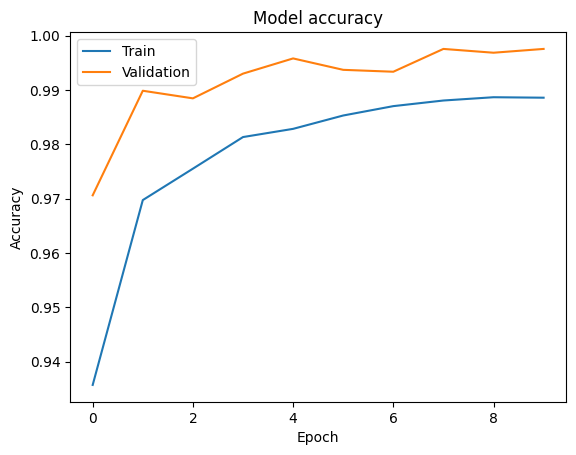

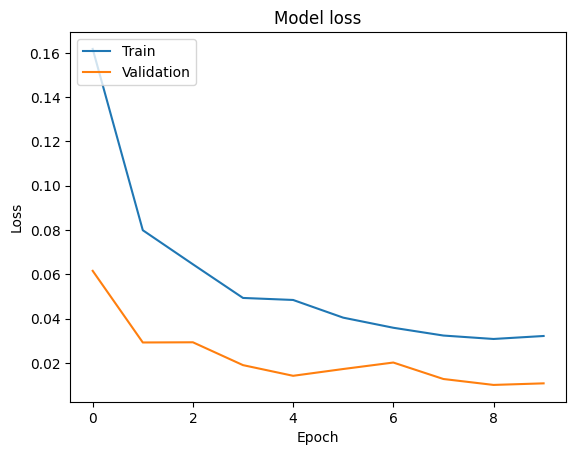

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import os

img_folder = '/content/cek'
for filename in os.listdir(img_folder):
    img_path = os.path.join(img_folder, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    sellable_prob = prediction[0][0]
    unsellable_prob = prediction[0][1]

    if sellable_prob > unsellable_prob:
        print(f'{filename} is sellable.')
    else:
        print(f'{filename} is unsellable.')


# save model

In [ ]:
# Menyimpan model ke dalam file
model.save('Model_TrashCash_V3.h5')

# Unduh file model dan label kategori
from google.colab import files

files.download('Model_TrashCash_V3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# convert model


In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!tensorflowjs_converter --input_format keras /content/Model_TrashCash_V3.h5 /content/ModelTrashCash


2023-06-11 07:24:11.973329: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 07:24:13.321231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import shutil

# Mendapatkan daftar file hasil konversi
output_folder = '/content/ModelTrashCash'
files_in_output_folder = !ls $output_folder

# Mengompresi file hasil konversi menjadi ZIP
shutil.make_archive('/content/ModelTrashCash', 'zip', output_folder)

# Mengunduh arsip ZIP
files.download('/content/ModelTrashCash.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>